In [ ]:
#library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Upload your file
from google.colab import files
uploaded = files.upload()  # This opens a dialog to upload the file

df = pd.read_csv("/content/IRIS.csv", encoding='latin-1')
# Display the first few rows
df.head()

Saving IRIS.csv to IRIS (2).csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


visualizations

In [ ]:
X=df.drop(columns=['species'],axis=1)
Y=df['species']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

reg_model=LogisticRegression()
reg_model.fit(X_train,Y_train)
y_pred=reg_model.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_pred)

rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,Y_train)
y_pred=rfc_model.predict(X_test)

print("logistic regression model:")
print("confusion matrix:", confusion_matrix(Y_test, y_pred))
print("classification report:", classification_report(Y_test, y_pred))
print("random forest classifier model:")
print("confusion matrix:", confusion_matrix(Y_test, y_pred))
print("classification report:", classification_report(Y_test, y_pred))
acc_lr = accuracy_score(Y_test,y_pred)
acc_rfc = accuracy_score(Y_test,y_pred)
print("accuracy of logistic regression model:{ acc_lr*100:.2f}%")
print("accuracy of random forest classifier model:{acc_rfc*100:.2f}%")

logistic regression model:
confusion matrix: [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
classification report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

random forest classifier model:
confusion matrix: [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
classification report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00   

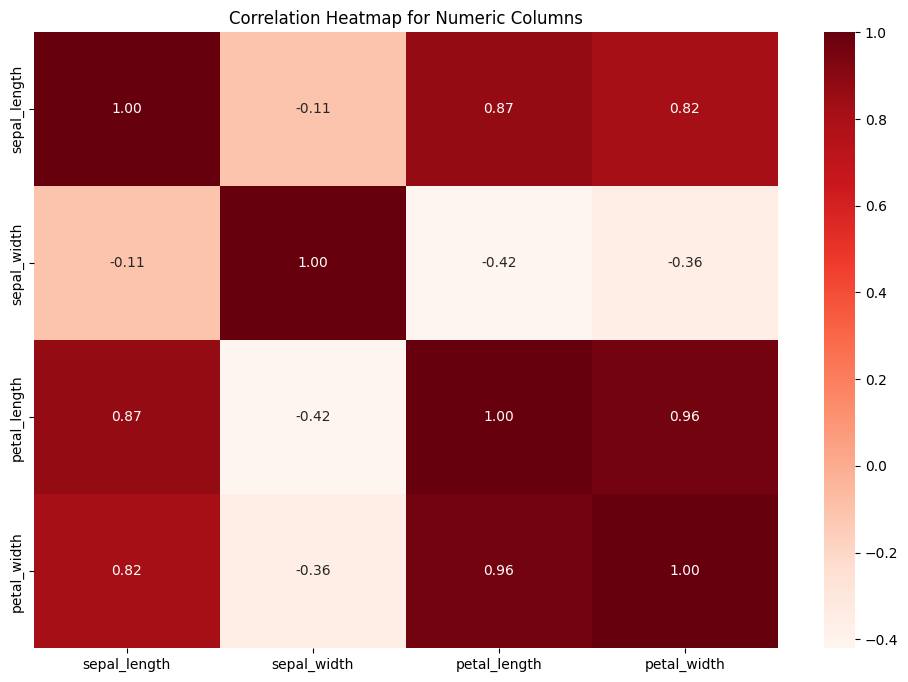

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()

In [ ]:
data={
    'sepal_length': [5],
    'sepal_width' : [3],
    'petal_length' : [1.5],
    'petal_width' : [0.2],
}

input_data = pd.DataFrame(data)
flower_type = rfc_model.predict(input_data)[0]
print(f"\nFlower Classified as:", flower_type)



Flower Classified as: Iris-setosa
